In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats

In [46]:
from analytic_tools import *

In [3]:
file_path = r'C:\\Users\\Alex Willett\\ATP_tennis_project\\data\\'

# Functions

In [4]:
def add_matchId(df):
    df['name'] = df['name'].str.replace(' ', '')
    df['tournament'] = df['tournament'].str.replace(' ', '')
    df['match_id'] = df['name'] + '_' + df['tournament'] + '_' + df['round']
    return df

def replace_valueName(df, name):
    """
    name: str
    """
    df[name] = df['value']
    return df

### Grand Slam Aces

In [5]:
file = 'grandSlam_aces.csv'

In [6]:
aces = pd.DataFrame(pd.read_csv(f'{file_path}{file}'))

In [7]:
aces = add_matchId(aces)
aces = replace_valueName(aces, 'aces')

### Combining relavent data into a Mastrer

#### The master seed

In [8]:
relavent_cols = ['match_id', 'name', 'country_id', 'date', 'tournament', 'surface', 'indoor', 'speed', 'round', 'score', 'winner', 'aces']
master_seed = aces[relavent_cols]

In [9]:
master_seed

,match_id,name,country_id,date,tournament,surface,indoor,speed,round,score,winner,aces
0,JohnIsner_Wimbledon_R128,JohnIsner,USA,6/27/2022,Wimbledon,G,False,70,R128,6-7(6) 7-6(3) 4-6 6-3 7-5,True,54
1,MaximeCressy_RolandGarros_R128,MaximeCressy,USA,5/22/2022,RolandGarros,C,False,37,R128,3-6 2-6 7-6(8) 6-4 6-4,False,42
2,JohnIsner_AustralianOpen_R128,JohnIsner,USA,1/17/2022,AustralianOpen,H,False,67,R128,7-6(2) 7-5 6-7(4) 6-7(4) 6-4,False,39
3,JohnIsner_Wimbledon_R64,JohnIsner,USA,6/27/2022,Wimbledon,G,False,70,R64,6-4 7-6(4) 6-7(3) 6-4,True,38
4,NickKyrgios_Wimbledon_R16,NickKyrgios,AUS,6/27/2022,Wimbledon,G,False,70,R16,4-6 6-4 7-6(2) 3-6 6-2,True,35
...,...,...,...,...,...,...,...,...,...,...,...,...
993,SebastianBaez_Wimbledon_R64,SebastianBaez,ARG,6/27/2022,Wimbledon,G,False,70,R64,6-1 6-2 6-4,False,0
994,StefanKozlov_USOpen_R128,StefanKozlov,USA,8/29/2022,USOpen,H,False,62,R128,6-2 6-4 6-0,False,0
995,TimofeySkatov_AustralianOpen_R128,TimofeySkatov,RUS,1/17/2022,AustralianOpen,H,False,67,R128,6-3 6-2 1-6 6-4,False,0
996,TommyPaul_Wimbledon_R128,TommyPaul,USA,6/27/2022,Wimbledon,G,False,70,R128,6-1 6-2 7-6(4),True,0


#### 1st variable to combine 1st Serve Percent

In [10]:
firstServe_pcnt = pd.read_csv(f'{file_path}grandSlam_1stServePcnt.csv')

In [11]:
firstServe_pcnt = add_matchId(firstServe_pcnt)

In [12]:
firstServe_pcnt = replace_valueName(firstServe_pcnt, '1stServe%')

In [17]:
firstServe_pcnt_slim = firstServe_pcnt[['match_id', 'date', '1stServe%', 'winner']]

In [18]:
firstServe_pcnt_slim 

,match_id,date,1stServe%,winner
0,PabloAndujar_AustralianOpen_R128,1/17/2022,84.90%,True
1,NickKyrgios_AustralianOpen_R128,1/17/2022,80.60%,True
2,HugoDellien_RolandGarros_R128,5/22/2022,79.70%,True
3,SebastianBaez_AustralianOpen_R128,1/17/2022,79.40%,True
4,MikaelYmer_RolandGarros_R32,5/22/2022,78.60%,False
...,...,...,...,...
993,JannikSinner_USOpen_R16,8/29/2022,46.30%,True
994,PeterGojowczyk_USOpen_R128,8/29/2022,45.90%,False
995,DenisShapovalov_Wimbledon_R64,6/27/2022,45.80%,False
996,AlexDeMinaur_USOpen_R128,8/29/2022,44.30%,True


In [71]:
master = master_seed.merge(firstServe_pcnt_slim, how='inner', on='match_id', suffixes=['_aces', '_1stServe%'])

In [73]:
assert (master['date_aces'] == master['date_1stServe%']).all() & (master['winner_aces'] == master['winner_1stServe%']).all()

In [74]:
# If not error above continue

In [75]:
master['1stServe%'] = master['1stServe%'].str[:-1]

In [81]:
master['1stServe%'] = pd.to_numeric(master['1stServe%'])

In [ ]:
master['aces']

In [76]:
master['date'] = master['date_aces']
master['winner'] = master['winner_aces']
master.drop(columns= ['date_aces', 'date_1stServe%', 'winner_aces', 'winner_1stServe%'], inplace=True)

In [82]:
master

,match_id,name,country_id,tournament,surface,indoor,speed,round,score,aces,1stServe%,date,winner
0,JohnIsner_Wimbledon_R128,JohnIsner,USA,Wimbledon,G,False,70,R128,6-7(6) 7-6(3) 4-6 6-3 7-5,54,73.7,6/27/2022,True
1,MaximeCressy_RolandGarros_R128,MaximeCressy,USA,RolandGarros,C,False,37,R128,3-6 2-6 7-6(8) 6-4 6-4,42,65.7,5/22/2022,False
2,JohnIsner_AustralianOpen_R128,JohnIsner,USA,AustralianOpen,H,False,67,R128,7-6(2) 7-5 6-7(4) 6-7(4) 6-4,39,67.5,1/17/2022,False
3,JohnIsner_Wimbledon_R64,JohnIsner,USA,Wimbledon,G,False,70,R64,6-4 7-6(4) 6-7(3) 6-4,38,72.9,6/27/2022,True
4,NickKyrgios_Wimbledon_R16,NickKyrgios,AUS,Wimbledon,G,False,70,R16,4-6 6-4 7-6(2) 3-6 6-2,35,73.8,6/27/2022,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,SebastianBaez_Wimbledon_R64,SebastianBaez,ARG,Wimbledon,G,False,70,R64,6-1 6-2 6-4,0,67.1,6/27/2022,False
994,StefanKozlov_USOpen_R128,StefanKozlov,USA,USOpen,H,False,62,R128,6-2 6-4 6-0,0,67.5,8/29/2022,False
995,TimofeySkatov_AustralianOpen_R128,TimofeySkatov,RUS,AustralianOpen,H,False,67,R128,6-3 6-2 1-6 6-4,0,74.2,1/17/2022,False
996,TommyPaul_Wimbledon_R128,TommyPaul,USA,Wimbledon,G,False,70,R128,6-1 6-2 7-6(4),0,60.8,6/27/2022,True


# Practice analysis

In [86]:
winners = master.loc[master['winner'] == True].copy()

In [87]:
winners.head()

,match_id,name,country_id,tournament,surface,indoor,speed,round,score,aces,1stServe%,date,winner
0,JohnIsner_Wimbledon_R128,JohnIsner,USA,Wimbledon,G,False,70,R128,6-7(6) 7-6(3) 4-6 6-3 7-5,54,73.7,6/27/2022,True
3,JohnIsner_Wimbledon_R64,JohnIsner,USA,Wimbledon,G,False,70,R64,6-4 7-6(4) 6-7(3) 6-4,38,72.9,6/27/2022,True
4,NickKyrgios_Wimbledon_R16,NickKyrgios,AUS,Wimbledon,G,False,70,R16,4-6 6-4 7-6(2) 3-6 6-2,35,73.8,6/27/2022,True
5,MarinCilic_RolandGarros_QF,MarinCilic,CRO,RolandGarros,C,False,37,QF,5-7 6-3 6-4 3-6 7-6(2),33,57.5,5/22/2022,True
6,DaniilMedvedev_AustralianOpen_R64,DaniilMedvedev,RUS,AustralianOpen,H,False,67,R64,7-6(1) 6-4 4-6 6-2,31,66.4,1/17/2022,True


In [88]:
losers = master.loc[master['winner'] == False].copy()

In [89]:
losers.head()

,match_id,name,country_id,tournament,surface,indoor,speed,round,score,aces,1stServe%,date,winner
1,MaximeCressy_RolandGarros_R128,MaximeCressy,USA,RolandGarros,C,False,37,R128,3-6 2-6 7-6(8) 6-4 6-4,42,65.7,5/22/2022,False
2,JohnIsner_AustralianOpen_R128,JohnIsner,USA,AustralianOpen,H,False,67,R128,7-6(2) 7-5 6-7(4) 6-7(4) 6-4,39,67.5,1/17/2022,False
8,NickKyrgios_USOpen_QF,NickKyrgios,AUS,USOpen,H,False,62,QF,7-5 4-6 7-5 6-7(3) 6-4,31,71.9,8/29/2022,False
13,NickKyrgios_Wimbledon_F,NickKyrgios,AUS,Wimbledon,G,False,70,F,4-6 6-3 6-4 7-6(3),30,72.8,6/27/2022,False
17,AlexanderBublik_USOpen_R64,AlexanderBublik,KAZ,USOpen,H,False,62,R64,4-6 6-4 6-3 7-6(5),28,59.9,8/29/2022,False


Slope: -0.0490290667851915
Intercept: 63.64584352982522
Pearson R-score: -0.053630753440832984
P-value: 0.23174473958374361
Standard Error: 0.040948317593922506
R-squared: 0.002876257714631514


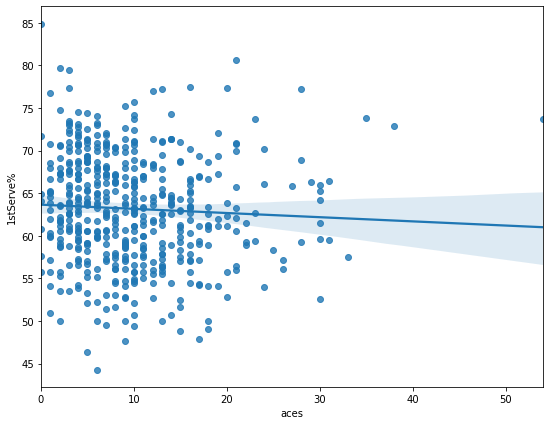

In [91]:
_ = calc_linear_regression(winners['aces'], winners['1stServe%'])